# Market Basket Analysis on Grocery Data
- Dataset: Groceries Dataset
- Task: Discover frequent item combinations in supermarket purchases.
- Steps:
  1. Preprocess data (convert transaction lists into a matrix format).
  2. Apply Apriori algorithm to find strong association rules.
  3. Visualize results using network graphs.


In [12]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import networkx as nx


In [13]:
# Load the dataset
df = pd.read_csv("Groceries_dataset.csv")


In [14]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


In [15]:
# Data Overview
print("\nDataset Information:")
df.info()



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [16]:
# Check for duplicates
duplicates = df[df.duplicated()]
print(f"\nNumber of duplicate rows: {duplicates.shape[0]}")



Number of duplicate rows: 759


In [17]:
# Unique items in the dataset
unique_items = df['itemDescription'].nunique()
print(f"\nNumber of unique items: {unique_items}")



Number of unique items: 167


In [18]:
# Most purchased items
print("\nTop 10 most purchased items:")
print(df['itemDescription'].value_counts().head(10))


Top 10 most purchased items:
itemDescription
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: count, dtype: int64


In [19]:
# Data Cleaning: Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
print("\nData types after cleaning:")
print(df.dtypes)


Data types after cleaning:
Member_number               int64
Date               datetime64[ns]
itemDescription            object
dtype: object


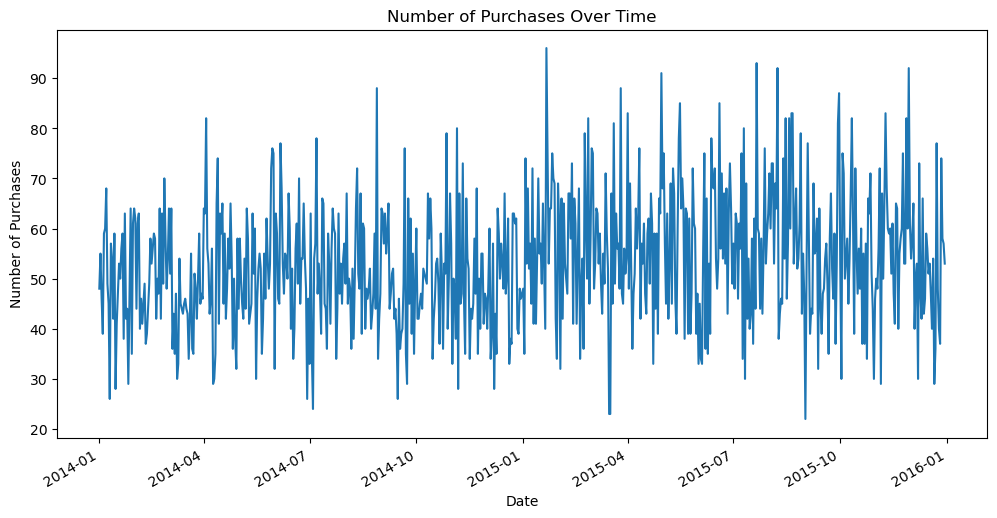

In [20]:
# Visualize the number of purchases over time
plt.figure(figsize=(12, 6))
df['Date'].value_counts().sort_index().plot()
plt.title('Number of Purchases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Purchases')
plt.show()

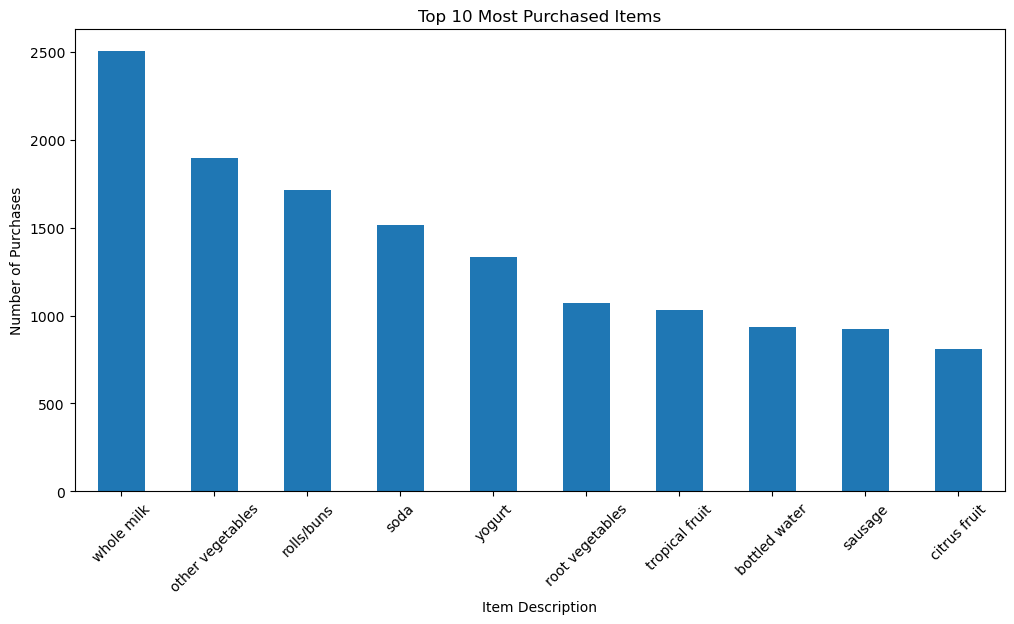

In [21]:
# Visualize the top 10 most purchased items
plt.figure(figsize=(12, 6))
df['itemDescription'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Purchased Items')
plt.xlabel('Item Description')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

In [37]:
# Preprocess data: Group transactions by Member_number and Date
basket = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(set).reset_index()
print("\nBasket dataset after grouping:")
print(basket.head())


Basket dataset after grouping:
   Member_number       Date                                    itemDescription
0           1000 2014-06-24                  {whole milk, salty snack, pastry}
1           1000 2015-03-15  {whole milk, sausage, semi-finished bread, yog...
2           1000 2015-05-27                         {soda, pickled vegetables}
3           1000 2015-07-24                     {misc. beverages, canned beer}
4           1000 2015-11-25                        {hygiene articles, sausage}


In [25]:
# One-Hot Encoding: Convert transaction data into a binary matrix
encoded_df = basket['itemDescription'].explode().str.get_dummies().groupby(level=0).max()
encoded_df = encoded_df.astype(bool)
print("\nEncoded dataset (binary matrix):")
print(encoded_df.head())


Encoded dataset (binary matrix):
   Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   
3                  False     False             False             False   
4                  False     False             False             False   

   baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
0           False  False          False             False  False    False   
1           False  False          False             False  False    False   
2           False  False          False             False  False    False   
3           False  False          False             False  False    False   
4           False  False          False             False  False    False   

   ...  turkey  vinegar  waffles  whipped/sour cream  whis

In [23]:
# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(encoded_df, min_support=0.001, use_colnames=True, low_memory=True)
print("\nFrequent itemsets:")
print(frequent_itemsets.head())


Frequent itemsets:
    support                 itemsets
0  0.004010  (Instant food products)
1  0.021386               (UHT-milk)
2  0.001470       (abrasive cleaner)
3  0.001938       (artif. sweetener)
4  0.008087          (baking powder)


In [24]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric='support', min_threshold=0.001)
print("\nAssociation rules:")
print(rules.head())


Association rules:
          antecedents         consequents  antecedent support  \
0          (UHT-milk)     (bottled water)            0.021386   
1     (bottled water)          (UHT-milk)            0.060683   
2  (other vegetables)          (UHT-milk)            0.122101   
3          (UHT-milk)  (other vegetables)            0.021386   
4        (rolls/buns)          (UHT-milk)            0.110005   

   consequent support   support  confidence      lift  representativity  \
0            0.060683  0.001069    0.050000  0.823954               1.0   
1            0.021386  0.001069    0.017621  0.823954               1.0   
2            0.021386  0.002139    0.017515  0.818993               1.0   
3            0.122101  0.002139    0.100000  0.818993               1.0   
4            0.021386  0.001804    0.016403  0.767013               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0 -0.000228    0.988755      -0.179204  0.013201  -0.011373    0

In [26]:
# Sort rules by lift (to find the strongest associations)
sorted_rules = rules.sort_values('lift', ascending=False)
print("\nTop 10 association rules sorted by lift:")
print(sorted_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))



Top 10 association rules sorted by lift:
                antecedents            consequents   support  confidence  \
1236              (sausage)   (whole milk, yogurt)  0.001470    0.024363   
1233   (whole milk, yogurt)              (sausage)  0.001470    0.131737   
1232  (whole milk, sausage)               (yogurt)  0.001470    0.164179   
1237               (yogurt)  (whole milk, sausage)  0.001470    0.017121   
474   (specialty chocolate)         (citrus fruit)  0.001403    0.087866   
475          (citrus fruit)  (specialty chocolate)  0.001403    0.026415   
1234      (sausage, yogurt)           (whole milk)  0.001470    0.255814   
1235           (whole milk)      (sausage, yogurt)  0.001470    0.009310   
618        (tropical fruit)                (flour)  0.001069    0.015779   
619                 (flour)       (tropical fruit)  0.001069    0.109589   

          lift  
1236  2.182917  
1233  2.182917  
1232  1.911760  
1237  1.911760  
474   1.653762  
475   1.653762  
12

In [33]:
# Function to recommend products based on association rules
def recommender_products(product_x, th=0.001, top_n=3):
    """
    Recommends products based on association rules.
    :param product_x: The product to base recommendations on.
    :param th: Minimum support threshold for Apriori.
    :param top_n: Number of recommendations to return.
    :return: List of recommended products.
    """
    # Create a unique invoice ID for each transaction
    df['invoice'] = df['Member_number'].astype(str) + '_' + df['Date'].astype(str)

    # Create a pivot table (binary matrix)
    pivot_df = pd.pivot_table(df, index='invoice', columns='itemDescription', values='Member_number', aggfunc='count', fill_value=0)
    pivot_df = pivot_df > 0  # Convert to True/False
    
    # Apply Apriori algorithm
    frequent_items = apriori(pivot_df, min_support=th, use_colnames=True)
    rules = association_rules(frequent_items, metric='lift', min_threshold=1)

    # Filter rules that contain the input product
    filtered_rules = rules[rules['antecedents'].apply(lambda x: product_x in x)]
    sorted_rules = filtered_rules.sort_values(by=['lift', 'confidence'], ascending=False)

    # Extract recommended products
    recommendations = []
    for _, row in sorted_rules.iterrows():
        recommendations.extend(list(row['consequents']))
        if len(recommendations) >= top_n:
            break

    return list(dict.fromkeys(recommendations))[:top_n]  # Remove duplicates


In [34]:
# Test the recommender function
print("\nRecommended products for 'sausage':")
print(recommender_products('sausage'))



Recommended products for 'sausage':
['whole milk', 'yogurt']


`Network Graph: A visual representation of the top association rules.`



In [35]:
# Visualize association rules using a network graph
def plot_network_graph(rules, top_n=10):
    """
    Plots a network graph of the top association rules.
    :param rules: DataFrame containing association rules.
    :param top_n: Number of rules to plot.
    """
    # Create a directed graph
    G = nx.DiGraph()

    # Add edges to the graph
    for _, rule in rules.head(top_n).iterrows():
        G.add_edge(', '.join(rule['antecedents']), ', '.join(rule['consequents']), weight=rule['lift'])

    # Plot the graph
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G, k=0.5)
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
    plt.title("Network of Association Rules")
    plt.show()




Plotting network graph for top 10 association rules...


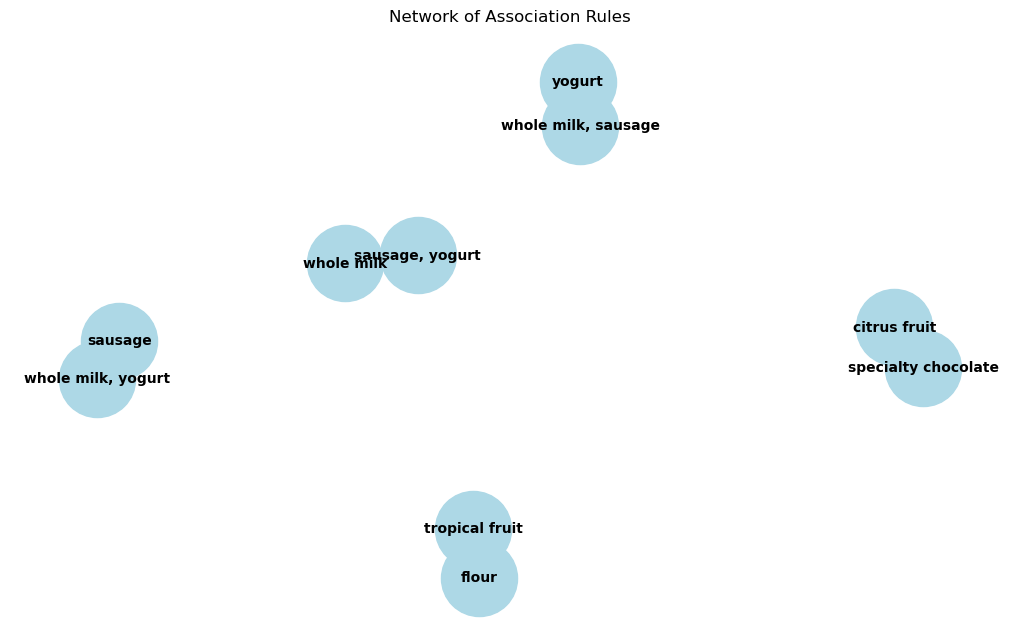

In [36]:
# Plot the network graph for the top 10 rules
print("\nPlotting network graph for top 10 association rules...")
plot_network_graph(sorted_rules, top_n=10)